# Mike's cosine test case, multichannel

The goal of this example is separating the signal from the random fields, themselves.

Begin by making the same data file.

In [1]:
import numpy as np
f = open('Test.dat','w')
for i in range(0,10000):
  print(i*0.01,np.random.random()+np.cos(i*0.01),np.random.random()+np.cos(i*0.01),np.random.random()*np.cos(i*0.01),file=f)

f.close()

### Now generate the SSA

In [17]:
import pyEXP
coefs = pyEXP.coefs.Coefs.factory('Test.dat')

# A list with three keys.  Keys are integer arrays (or lists).  
# The first column of the data table has the key [0], etc.
keylst = [[0], [1], [2]]
config = {"cosine": (coefs, keylst, [])}

# Window size is half the time series (a good default choice if it's practical)
window = int(len(coefs.Times())/2)

# Keep the first 10 PCs
npc = 10

flags = """
# Jacobi: true
# Traj: true
"""

# Initialize the MSSA and compute the eigenvalues
ssa = pyEXP.mssa.expMSSA(config, window, npc)
ev = ssa.eigenvalues()

shape U = 15000 x 10


---- Coefs::factory: error opening as HDF5, trying EXP native and ascii table
---- Coefs::factory: read ascii and created TableData


### Plot the eigenvalues

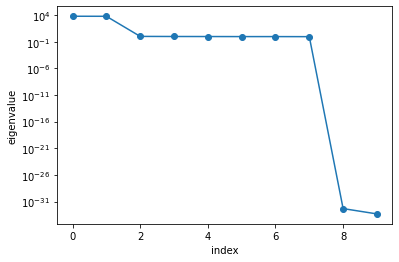

In [44]:
import matplotlib.pyplot as plt

plt.semilogy(ev, '-o')
plt.xlabel('index')
plt.ylabel('eigenvalue')
plt.show()

The cosine fields give a pair of primary PCs.  The 3 independent random fields give 3 pairs of secondary PCs.  The remaining PCs are zero.  It's interesting that the addition of multiple channels segregates the random field into 6 PCs, unlike the single channel in the previous example.

### Look at the first 10 PCs

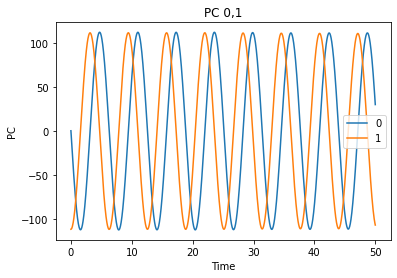

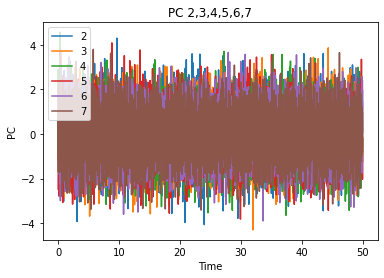

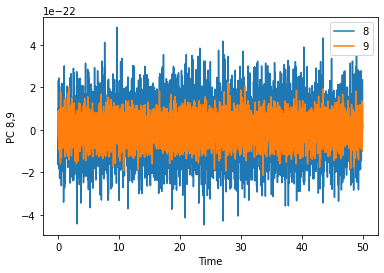

In [30]:
pc = ssa.getPC()
nt = pc.shape[0]
for i in range(0,2):
    plt.plot(coefs.Times()[:nt], pc[:,i], label=str(i))
plt.xlabel('Time')
plt.ylabel('PC')
plt.legend()
plt.title("PC 0,1")
plt.show()

for i in range(2,8):
    plt.plot(coefs.Times()[:nt], pc[:,i], label=str(i))
plt.xlabel('Time')
plt.ylabel('PC')
plt.legend()
plt.title('PC 2,3,4,5,6,7')
plt.show()

for i in range(8,10):
    plt.plot(coefs.Times()[:nt], pc[:,i], label=str(i))
plt.xlabel('Time')
plt.ylabel('PC 8,9')
plt.legend()
plt.show()


The first two PCs contain the sinusoidal variation.  The next 6 PCs contain the sine and cosine contributions to the 3 random fields, one for each data channel.  The rest are zero.

### Compute the power spectrum of the PCs

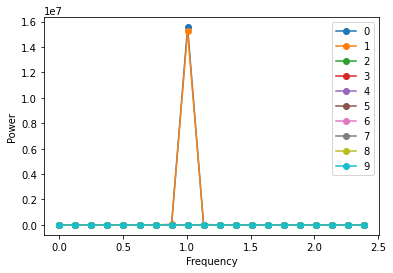

In [45]:
freq, power = ssa.pcDFT()
for i in range(power.shape[1]):
    plt.plot(freq[0:20], power[0:20,i], '-o', label=str(i))
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend()
plt.show()

We expect our power at $f=1$ and that's what we find!

### Compute the power spectrum of the reconstruction

In [32]:
ssa.reconstruct([0, 1])

In [33]:
ssa.getRCkeys()

[[0, 0], [1, 0], [2, 0]]

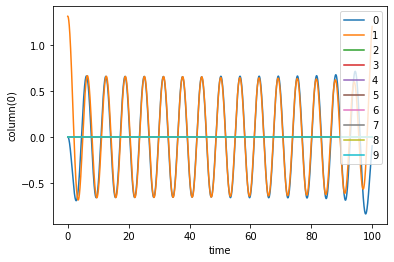

In [34]:
recon = ssa.getRC([0, 0])
for i in range(recon.shape[1]):
    plt.plot(coefs.Times(), recon[:,i], label=str(i))
plt.xlabel('time')
plt.ylabel('column(0)')
plt.legend()
plt.show()

In [ ]:
ssa.reconstruct([*range(10)])

Redo the reconstructions for all 10 PCs.  The look at the reconstruction for the first data column.

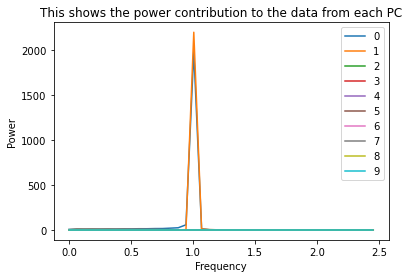

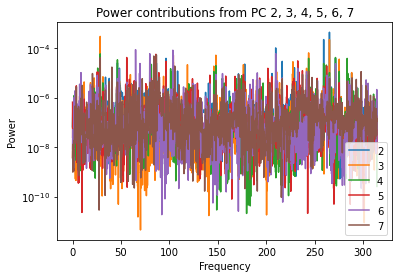

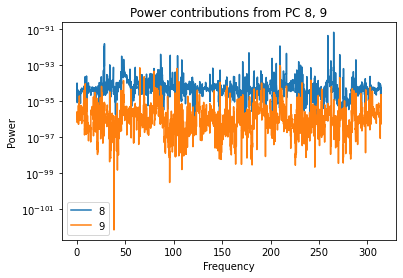

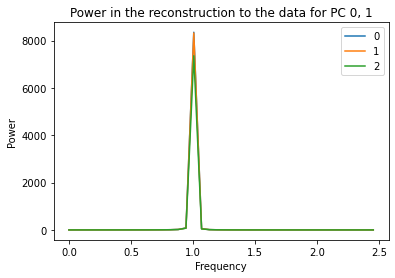

In [43]:
key = [0, 0] # First column, first data set (there is only one data set here)

freq, power = ssa.singleDFT(key)

for i in range(power.shape[1]):
    plt.plot(freq[0:40], power[0:40,i], label=str(i))
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('This shows the power contribution to the data from each PC')
plt.legend()
plt.show()

for i in range(2, 8):
    plt.semilogy(freq, power[:,i], label=str(i))
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Power contributions from PC 2, 3, 4, 5, 6, 7')
plt.legend()
plt.show()

for i in range(8, 10):
    plt.semilogy(freq, power[:,i], label=str(i))
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Power contributions from PC 8, 9')
plt.legend()
plt.show()

freq, power = ssa.channelDFT()
for i in range(power.shape[1]):
    plt.plot(freq[0:40], power[0:40,i], label=str(i))
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Power in the reconstruction to the data for PC 0, 1')
plt.legend()
plt.show()

This shows the power contribution to the data column 0 from each PC.  It's all PC 0, 1, of course, at the same frequency ($f=1$) as the PC itself.   PCs 2-7 contain the random fields; these have a flat power spectrum expected for pure white noise.  And the remaining PCs have no power.